In [290]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [291]:
data=pd.read_csv('train.csv')


In [292]:
data.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,1,Development,Course,0,1,1,11004,0.007,81
1,2,2,1,Development,Course,0,0,1,13650,0.007,79
2,3,3,1,Development,Course,0,0,1,11655,0.007,75
3,4,4,1,Development,Course,0,0,1,12054,0.007,80
4,5,5,1,Development,Course,0,0,1,6804,0.007,41


In [293]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512087 entries, 0 to 512086
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  512087 non-null  int64  
 1   Day_No              512087 non-null  int64  
 2   Course_ID           512087 non-null  int64  
 3   Course_Domain       512087 non-null  object 
 4   Course_Type         512087 non-null  object 
 5   Short_Promotion     512087 non-null  int64  
 6   Public_Holiday      512087 non-null  int64  
 7   Long_Promotion      512087 non-null  int64  
 8   User_Traffic        512087 non-null  int64  
 9   Competition_Metric  510323 non-null  float64
 10  Sales               512087 non-null  int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 43.0+ MB


In [294]:
data.describe()

,ID,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
count,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,510323.000000,512087.000000
mean,274007.300650,434.917869,300.388344,0.380244,0.031639,0.488968,15375.101198,0.073345,120.826924
std,158228.834029,256.044161,173.365787,0.485447,0.175038,0.499879,7727.231205,0.100115,54.355258
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000
25%,136962.500000,214.000000,150.000000,0.000000,0.000000,0.000000,10584.000000,0.010000,84.000000
50%,273984.000000,427.000000,300.000000,0.000000,0.000000,0.000000,13776.000000,0.035000,111.000000
75%,411065.500000,658.000000,451.000000,1.000000,0.000000,1.000000,18123.000000,0.094000,146.000000
max,548027.000000,882.000000,600.000000,1.000000,1.000000,1.000000,100002.000000,0.768000,682.000000


In [295]:
data.isnull().sum()

ID                       0
Day_No                   0
Course_ID                0
Course_Domain            0
Course_Type              0
Short_Promotion          0
Public_Holiday           0
Long_Promotion           0
User_Traffic             0
Competition_Metric    1764
Sales                    0
dtype: int64

In [296]:
data.dtypes

ID                      int64
Day_No                  int64
Course_ID               int64
Course_Domain          object
Course_Type            object
Short_Promotion         int64
Public_Holiday          int64
Long_Promotion          int64
User_Traffic            int64
Competition_Metric    float64
Sales                   int64
dtype: object

In [299]:
print(data['Course_Type'].value_counts())
print(data['Course_Domain'].value_counts())
data['Course_Type'].nunique()

Course     262747
Program    247576
Degree       1764
Name: Course_Type, dtype: int64
Development             264295
Software Marketing      166172
Finance & Accounting     77210
Business                  4410
Name: Course_Domain, dtype: int64


3

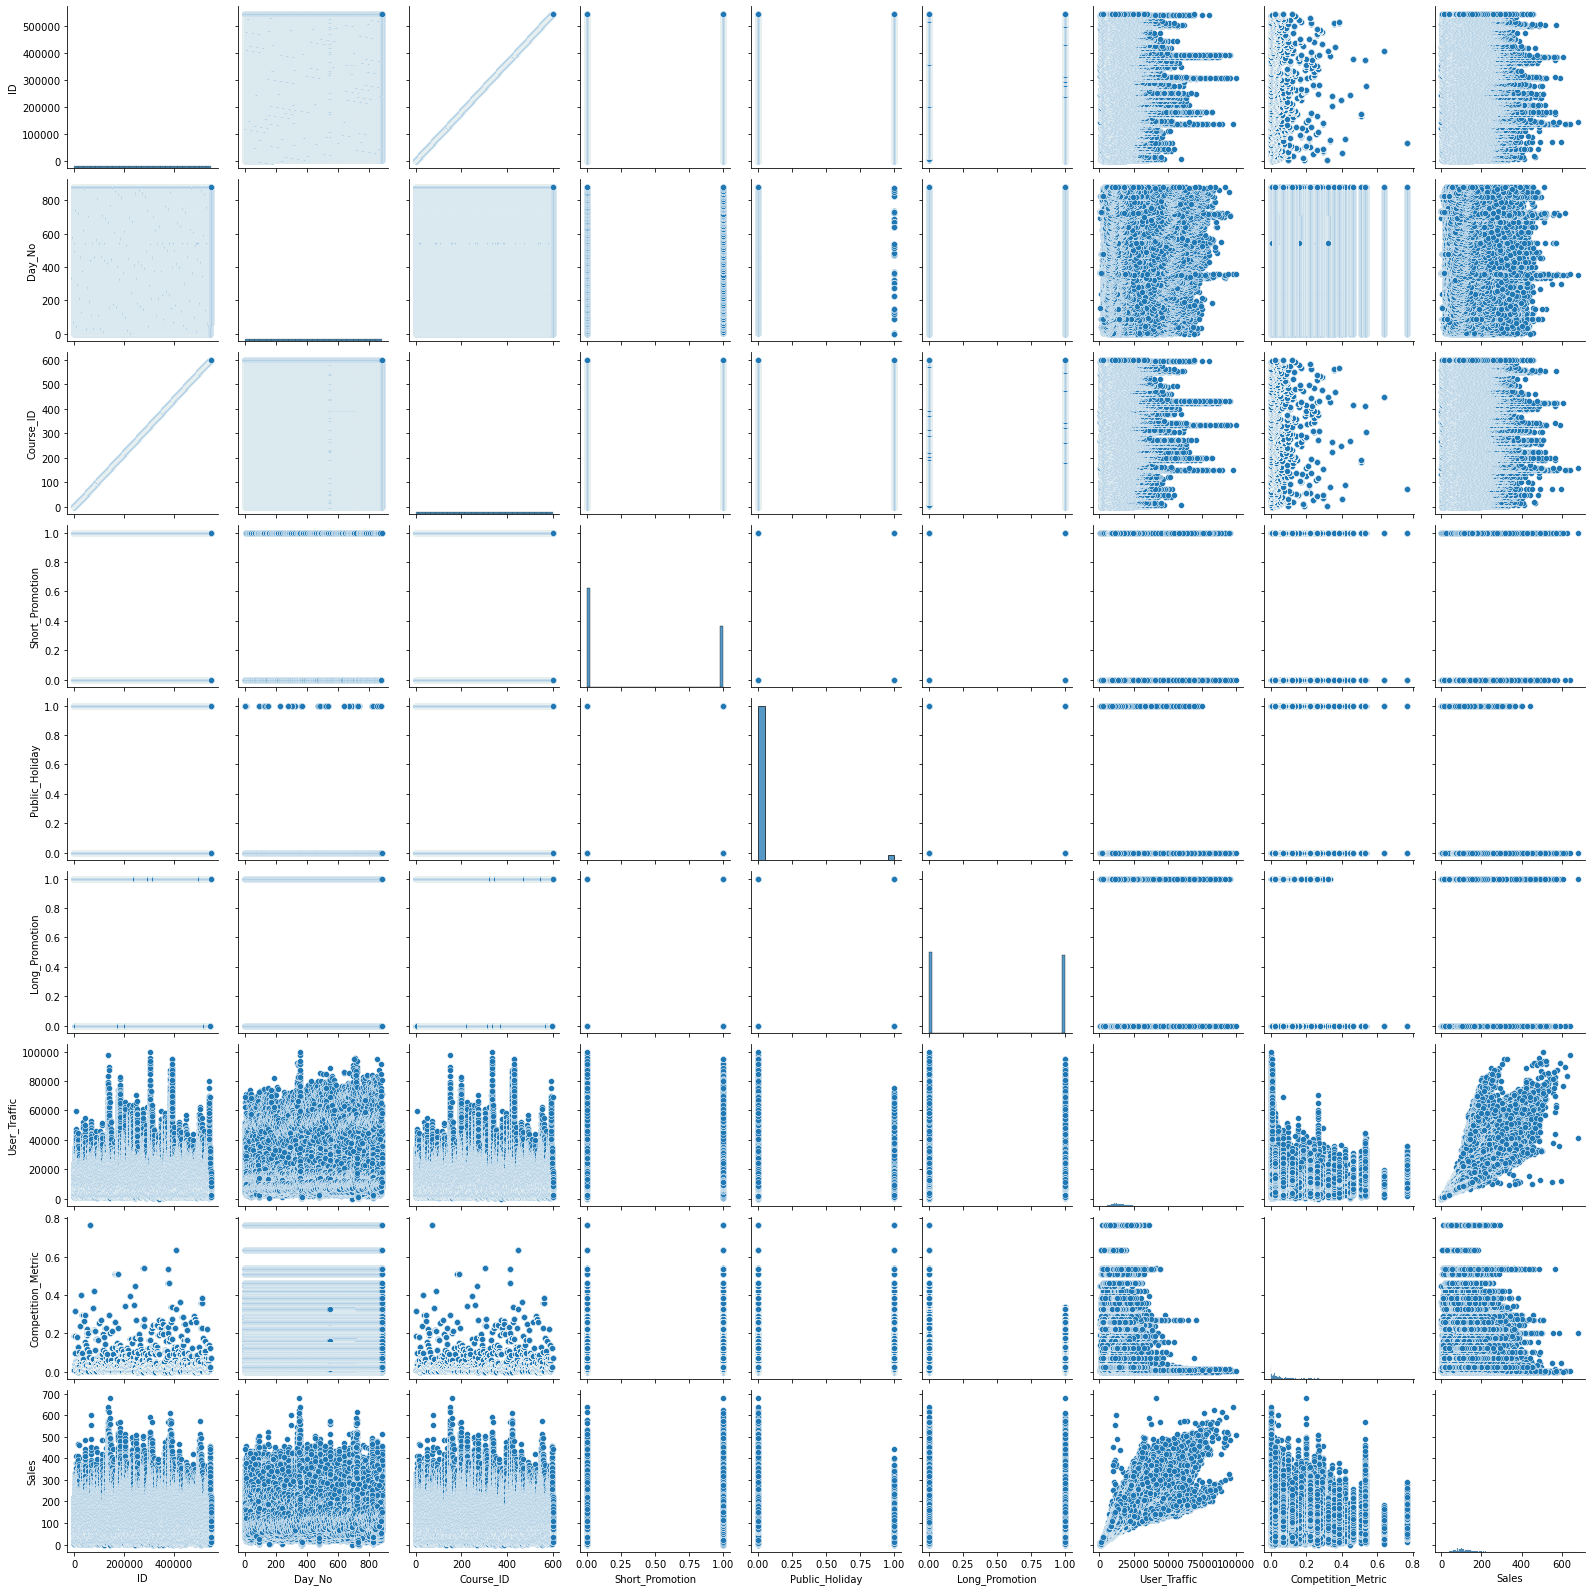

In [301]:
sns.pairplot(data)

<AxesSubplot:>

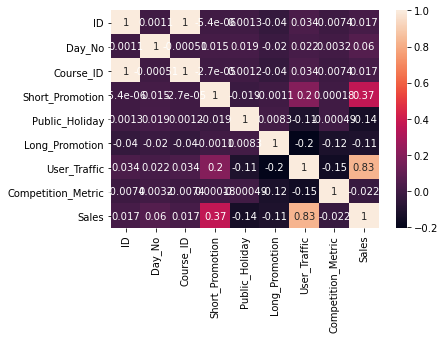

In [302]:
corr=data.corr()
sns.heatmap(corr,annot=True)

In [305]:
data['Competition_Metric']=data['Competition_Metric'].fillna(data['Competition_Metric'].mean())
data.isnull().sum()
x=data.drop(columns=['ID','User_Traffic','Sales'])
y=data['Sales']


In [306]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state=42,test_size=0.25 )  
train_x.shape,test_x.shape,train_y.shape,test_y.shape

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
RF_reg = RandomForestRegressor()
RF_reg.fit(train_x, train_y)

train_yhat=RF_reg.predict(train_x)
MSE=np.sqrt(mean_squared_error(train_y,train_yhat))
print('Mean square error',MSE)
MSLE=np.sqrt(mean_squared_log_error(train_y,train_yhat))
print('Mean square log error',MSLE*1000)
test_yhat=RF_reg.predict(test_x)
MSE_test=np.sqrt(mean_squared_error(test_y,test_yhat))
print('Mean square error',MSE_test)
MSLE_test=np.sqrt(mean_squared_log_error(test_y,test_yhat))
print('Mean square log error',MSLE_test*1000)
test_yhat

Mean square error 9.429996658035723
Mean square log error 103.8049820738714
Mean square error 25.32029456540998
Mean square log error 234.45379073860235


array([ 71.12,  90.77, 113.94, ...,  83.5 ,  64.13,  43.76])

### Test data

In [308]:
data_Test=pd.read_csv('testFile.csv')
data_Test.isnull().sum()
data_Test.shape

(36000, 9)

In [309]:
data_Test['Competition_Metric']=data_Test['Competition_Metric'].fillna(data_Test['Competition_Metric'].mean())
data_Test =pd.get_dummies(data_Test)

In [311]:
xt=data_Test.drop(columns=['ID'])
test_yt=RF_reg.predict(xt)
print(test_yt)

[111.85 111.85 111.85 ... 244.28 244.28 244.28]


In [314]:
TestOp = pd.DataFrame({"ID": data_Test['ID'], 'Sales': test_yt })
TestOp
TestOp.to_csv('Sales_prediction.csv',index=False)